In [1]:
# !pip install datapungibea
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas

import datapungibea as dpb
key = '1FD5DC35-4854-4CE8-8D43-B36065C37041'
data = dpb.data(key) 
data

In [2]:
# Collect county level variables
for_county_index = data.Regional(GeoFips = "COUNTY",
              LineCode = "1",
              TableName = "CAGDP9", 
              Year = "2010")
for_county_index

,Code,GeoFips,GeoName,TimePeriod,CL_UNIT,UNIT_MULT,DataValue,NoteRef
0,CAGDP9-1,01001,"Autauga, AL",2010,Thousands of chained 2012 dollars,3,"1,286,603",NaN
1,CAGDP9-1,01003,"Baldwin, AL",2010,Thousands of chained 2012 dollars,3,"5,381,575",NaN
2,CAGDP9-1,01005,"Barbour, AL",2010,Thousands of chained 2012 dollars,3,"784,043",NaN
3,CAGDP9-1,01007,"Bibb, AL",2010,Thousands of chained 2012 dollars,3,"364,023",NaN
4,CAGDP9-1,01009,"Blount, AL",2010,Thousands of chained 2012 dollars,3,"839,899",NaN
...,...,...,...,...,...,...,...,...
3113,CAGDP9-1,56037,"Sweetwater, WY",2010,Thousands of chained 2012 dollars,3,"4,423,250",NaN
3114,CAGDP9-1,56039,"Teton, WY",2010,Thousands of chained 2012 dollars,3,"1,811,469",NaN
3115,CAGDP9-1,56041,"Uinta, WY",2010,Thousands of chained 2012 dollars,3,"1,215,130",NaN
3116,CAGDP9-1,56043,"Washakie, WY",2010,Thousands of chained 2012 dollars,3,"388,974",NaN


In [3]:
counties = for_county_index["GeoFips"]
counties

0       01001
1       01003
2       01005
3       01007
4       01009
        ...  
3113    56037
3114    56039
3115    56041
3116    56043
3117    56045
Name: GeoFips, Length: 3118, dtype: object

In [4]:
for_GDP_components = data.Regional(GeoFips = "01001",
              LineCode = "ALL",
              TableName = "CAGDP9", 
              Year = "2010")
for_GDP_components

,Code,GeoFips,GeoName,TimePeriod,Description,CL_UNIT,UNIT_MULT,DataValue,NoteRef
0,CAGDP9-68,01001,"Autauga, AL",2010,"Educational services, health care, and social ...",Thousands of chained 2012 dollars,3,"68,204",NaN
1,CAGDP9-69,01001,"Autauga, AL",2010,Educational services,Thousands of chained 2012 dollars,3,(D),(D)
2,CAGDP9-70,01001,"Autauga, AL",2010,Health care and social assistance,Thousands of chained 2012 dollars,3,(D),(D)
3,CAGDP9-75,01001,"Autauga, AL",2010,"Arts, entertainment, recreation, accommodation...",Thousands of chained 2012 dollars,3,"40,706",NaN
4,CAGDP9-76,01001,"Autauga, AL",2010,"Arts, entertainment, and recreation",Thousands of chained 2012 dollars,3,"2,792",NaN
5,CAGDP9-56,01001,"Autauga, AL",2010,Real estate and rental and leasing,Thousands of chained 2012 dollars,3,"208,744",NaN
6,CAGDP9-59,01001,"Autauga, AL",2010,Professional and business services,Thousands of chained 2012 dollars,3,"43,107",NaN
7,CAGDP9-60,01001,"Autauga, AL",2010,"Professional, scientific, and technical services",Thousands of chained 2012 dollars,3,"20,204",NaN
8,CAGDP9-64,01001,"Autauga, AL",2010,Management of companies and enterprises,Thousands of chained 2012 dollars,3,(D),(D)
9,CAGDP9-65,01001,"Autauga, AL",2010,Administrative and support and waste managemen...,Thousands of chained 2012 dollars,3,(D),(D)


In [5]:
GDP_components = for_GDP_components[["Code", "Description"]]
GDP_components

,Code,Description
0,CAGDP9-68,"Educational services, health care, and social ..."
1,CAGDP9-69,Educational services
2,CAGDP9-70,Health care and social assistance
3,CAGDP9-75,"Arts, entertainment, recreation, accommodation..."
4,CAGDP9-76,"Arts, entertainment, and recreation"
5,CAGDP9-56,Real estate and rental and leasing
6,CAGDP9-59,Professional and business services
7,CAGDP9-60,"Professional, scientific, and technical services"
8,CAGDP9-64,Management of companies and enterprises
9,CAGDP9-65,Administrative and support and waste managemen...


In [6]:
# import time
# import random

# for row in GDP_components.iterrows():
#     full_code, description = row[1]
#     table_name, code = full_code.split("-")
   
#     try:
#         GDP_data_dct[description] = data.Regional(GeoFips = "COUNTY",
#               LineCode = code,
#               TableName = table_name, 
#               Year = "ALL")
#         print(full_code +": " + description + " downloaded")
#     except:
#         print(full_code +": Error downloading " + description)
#     time.sleep(10)

In [7]:
import os
GDP_data_dct = {}
folder1 = "Data"
folder2 = "CountyGDP"
try:
    os.mkdir(folder1)
    os.mkdir(folder1 + "/" + folder2)
except:
    try: 
        os.mkdir(folder1 + "/" + folder2)
    except:
        pass
# for key, val in GDP_data_dct.items():
#     val.to_csv(folder1 + "/" + folder2 + "/" + key.replace("/","") + ".csv")

for row in GDP_components.iterrows():
    full_code, description = row
    description = description[1]
    # somehow, space added in very last character of description
    GDP_data_dct[description] = pd.read_csv("Data/CountyGDP/" + description[:-1].replace("/","") + ".csv")
GDP_data_dct
# GDP_components

{'Educational services, health care, and social assistance ':        Unnamed: 0       Code  GeoFips      GeoName  TimePeriod  \
 0               0  CAGDP9-68     1001  Autauga, AL        2001   
 1               1  CAGDP9-68     1001  Autauga, AL        2002   
 2               2  CAGDP9-68     1001  Autauga, AL        2003   
 3               3  CAGDP9-68     1001  Autauga, AL        2004   
 4               4  CAGDP9-68     1001  Autauga, AL        2005   
 ...           ...        ...      ...          ...         ...   
 62355       62355  CAGDP9-68    56045   Weston, WY        2016   
 62356       62356  CAGDP9-68    56045   Weston, WY        2017   
 62357       62357  CAGDP9-68    56045   Weston, WY        2018   
 62358       62358  CAGDP9-68    56045   Weston, WY        2019   
 62359       62359  CAGDP9-68    56045   Weston, WY        2020   
 
                                  CL_UNIT  UNIT_MULT DataValue NoteRef  
 0      Thousands of chained 2012 dollars          3    36,9

In [8]:
os.getcwd()

# for a,b,c in os.walk("."):
#     print(a,b,c)

'C:\\Users\\abiodun.idowu\\OneDrive - North Dakota University System\\Desktop\\PhD\\BEA project\\notebook_to_start'

In [9]:
full_df = pd.DataFrame({key[:-1]: val.set_index(["GeoFips", "TimePeriod"])["DataValue"] for key, val in GDP_data_dct.items()})
for key, val in full_df.items():
    try:
        full_df[key] = val.str.replace(
            ",","").replace("(NA)",np.NaN).replace("(D)", np.NaN).astype(float)
    except:
        continue
            
full_df

Educational services, health care, and social assistance  \
GeoFips TimePeriod                                                             
1001    2001                                                  36977.0          
        2002                                                  36428.0          
        2003                                                  39334.0          
        2004                                                  45277.0          
        2005                                                  47107.0          
...                                                               ...          
56045   2016                                                      NaN          
        2017                                                   9447.0          
        2018                                                      NaN          
        2019                                                   8299.0          
        2020                                                   8102.0          

                    Educational services  Health care and social assistance  \
GeoFips TimePeriod                                                            
1001    2001                         NaN                                NaN   
        2002                      4405.0                            32148.0   
        2003                      4507.0                            34930.0   
        2004                      4666.0                            40675.0   
        2005                      4464.0                            42674.0   
...                                  ...                                ...   
56045   2016                         NaN                                NaN   
        2017                         NaN                                NaN   
        2018                         NaN                                NaN   
        2019                         NaN                                NaN   
        2020                         NaN                                NaN   

                    Arts, entertainment, recreation, accommodation, and food services  \
GeoFips TimePeriod                                                                      
1001    2001                                                  48577.0                   
        2002                                                  47411.0                   
        2003                                                  50585.0                   
        2004                                                  51503.0                   
        2005                                                  48623.0                   
...                                                               ...                   
56045   2016                                                   3856.0                   
        2017                                                   3415.0                   
        2018                                                      NaN                   
        2019                                                   3970.0                   
        2020                                                   3410.0                   

                    Arts, entertainment, and recreation  \
GeoFips TimePeriod                                        
1001    2001                                     2150.0   
        2002                                     1935.0   
        2003                                     1846.0   
        2004                                     1897.0   
        2005                                     2277.0   
...                                                 ...   
56045   2016                                      351.0   
        2017                                        NaN   
        2018                                        NaN   
        2019                                        NaN   
        2020                                        NaN   

                    Real 

In [10]:
# full_df[["Private industries ", "Utilities "]]
list (full_df.keys())

['Educational services, health care, and social assistance',
 'Educational services',
 'Health care and social assistance',
 'Arts, entertainment, recreation, accommodation, and food services',
 'Arts, entertainment, and recreation',
 'Real estate and rental and leasing',
 'Professional and business services',
 'Professional, scientific, and technical services',
 'Management of companies and enterprises',
 'Administrative and support and waste management and remediation services',
 'Transportation and utilities',
 'Manufacturing and information',
 'Private goods-producing industries 2',
 'Private services-providing industries 3',
 'Accommodation and food services',
 'Other services (except government and government enterprises)',
 'Government and government enterprises',
 'Natural resources and mining',
 'Trade',
 'Retail trade',
 'Transportation and warehousing',
 'Information',
 'Finance, insurance, real estate, rental, and leasing',
 'Finance and insurance',
 'Agriculture, forestry,

In [11]:
inputs = ['All industry total',"Utilities", "Mining, quarrying, and oil and gas extraction", 'Agriculture, forestry, fishing and hunting']
for key in inputs:
    full_df[key + " 3YMA"] = full_df.reset_index().set_index(["TimePeriod"], drop = False).groupby("GeoFips")[key].rolling(3).mean().shift()
log_df = np.log(full_df)#.groupby("GeoFips").diff()
for key in inputs:
    log_df[key + " Volatility"] = (log_df[key].sub(log_df[key + " 3YMA"])).pow(2).pow(.5)
# for key in inputs:

- GDP 
-- layer1

In [12]:
import json

In [13]:
toc = """All industry total
1 Private industries
1.1 Agriculture, forestry, fishing and hunting
1.2 Mining, quarrying, and oil and gas extraction
1.3 Utilities
1.4 Construction
1.5 Manufacturing
1.5.1 Durable goods manufacturing
1.5.2 Nondurable goods manufacturing
1.6 Wholesale trade
1.7 Retail trade
1.8 Transportation and warehousing
1.9 Information
1.10 Finance, insurance, real estate, rental, and leasing
1.11 Finance and insurance
1.12 Real estate and rental and leasing
1.13 Professional and business services
1.14 Professional, scientific, and technical services
1.15 Management of companies and enterprises
1.16 Administrative and support and waste management and remediation services
1.17 Educational services, health care, and social assistance
1.18 Educational services
1.19 Health care and social assistance
1.20 Arts, entertainment, recreation, accommodation, and food services
1.21 Arts, entertainment, and recreation
1.22 Accommodation and food services
1.23 Other services (except government and government enterprises)
1.24 Government and government enterprises
1.25 Natural resources and mining
1.26 Trade
1.27 Transportation and utilities
1.28 Manufacturing and information
1.29 Private goods-producing industries 2/
1.30 Private services-providing industries 3/
2 """

myfile = 'GDP'

data = {myfile:{}}
for line in toc.splitlines():
    levels, title = line.split(' ', maxsplit=1)
    levels = levels.rstrip('.').split('.')
    if len(levels) == 1:
        heading = title
        data[myfile][heading] = {}
    elif len(levels) == 2:
        sub_heading = title
        data[myfile][heading][sub_heading] = []
#     if len(levels) == 3:
#         data[myfile][heading][sub_heading].append(title)

print(json.dumps(data, indent=4))

{
    "GDP": {
        "industry total": {},
        "Private industries": {
            "Agriculture, forestry, fishing and hunting": [],
            "Mining, quarrying, and oil and gas extraction": [],
            "Utilities": [],
            "Construction": [],
            "Manufacturing": [],
            "Wholesale trade": [],
            "Retail trade": [],
            "Transportation and warehousing": [],
            "Information": [],
            "Finance, insurance, real estate, rental, and leasing": [],
            "Finance and insurance": [],
            "Real estate and rental and leasing": [],
            "Professional and business services": [],
            "Professional, scientific, and technical services": [],
            "Management of companies and enterprises": [],
            "Administrative and support and waste management and remediation services": [],
            "Educational services, health care, and social assistance": [],
            "Educational services": []

In [14]:
dct = data["GDP"]
layer1 = list(dct.keys())
layer1.pop()
layer2 = []
for key in layer1:
    layer2 = layer2 + list(dct[key].keys())
layers = {0:layer1,
         1:layer2}
layers

{0: ['industry total', 'Private industries'],
 1: ['Agriculture, forestry, fishing and hunting',
  'Mining, quarrying, and oil and gas extraction',
  'Utilities',
  'Construction',
  'Manufacturing',
  'Wholesale trade',
  'Retail trade',
  'Transportation and warehousing',
  'Information',
  'Finance, insurance, real estate, rental, and leasing',
  'Finance and insurance',
  'Real estate and rental and leasing',
  'Professional and business services',
  'Professional, scientific, and technical services',
  'Management of companies and enterprises',
  'Administrative and support and waste management and remediation services',
  'Educational services, health care, and social assistance',
  'Educational services',
  'Health care and social assistance',
  'Arts, entertainment, recreation, accommodation, and food services',
  'Arts, entertainment, and recreation',
  'Accommodation and food services',
  'Other services (except government and government enterprises)',
  'Government and gover

In [15]:
layer2

['Agriculture, forestry, fishing and hunting',
 'Mining, quarrying, and oil and gas extraction',
 'Utilities',
 'Construction',
 'Manufacturing',
 'Wholesale trade',
 'Retail trade',
 'Transportation and warehousing',
 'Information',
 'Finance, insurance, real estate, rental, and leasing',
 'Finance and insurance',
 'Real estate and rental and leasing',
 'Professional and business services',
 'Professional, scientific, and technical services',
 'Management of companies and enterprises',
 'Administrative and support and waste management and remediation services',
 'Educational services, health care, and social assistance',
 'Educational services',
 'Health care and social assistance',
 'Arts, entertainment, recreation, accommodation, and food services',
 'Arts, entertainment, and recreation',
 'Accommodation and food services',
 'Other services (except government and government enterprises)',
 'Government and government enterprises',
 'Natural resources and mining',
 'Trade',
 'Transpor

In [16]:
# keys = ['Agriculture, forestry, fishing and hunting',
#  'Mining, quarrying, and oil and gas extraction',
#  'Utilities',
#  'Construction',
#  'Manufacturing',
#  'Wholesale trade',
#  'Retail trade',
#  'Transportation and warehousing',
#  'Information',
#  'Finance, insurance, real estate, rental, and leasing',
#  'Finance and insurance',
#  'Professional and business services',
#  'Educational services, health care, and social assistance',
#  'Arts, entertainment, recreation, accommodation, and food services',
#  'Other services (except government and government enterprises)',
#  'Government and government enterprises']

In [17]:
# data2 = log_df[layer2].groupby("GeoFips").diff()
# # list(log_df.keys())

In [18]:
# data2

# list(data2)
# log_df
full_df

Educational services, health care, and social assistance  \
GeoFips TimePeriod                                                             
1001    2001                                                  36977.0          
        2002                                                  36428.0          
        2003                                                  39334.0          
        2004                                                  45277.0          
        2005                                                  47107.0          
...                                                               ...          
56045   2016                                                      NaN          
        2017                                                   9447.0          
        2018                                                      NaN          
        2019                                                   8299.0          
        2020                                                   8102.0          

                    Educational services  Health care and social assistance  \
GeoFips TimePeriod                                                            
1001    2001                         NaN                                NaN   
        2002                      4405.0                            32148.0   
        2003                      4507.0                            34930.0   
        2004                      4666.0                            40675.0   
        2005                      4464.0                            42674.0   
...                                  ...                                ...   
56045   2016                         NaN                                NaN   
        2017                         NaN                                NaN   
        2018                         NaN                                NaN   
        2019                         NaN                                NaN   
        2020                         NaN                                NaN   

                    Arts, entertainment, recreation, accommodation, and food services  \
GeoFips TimePeriod                                                                      
1001    2001                                                  48577.0                   
        2002                                                  47411.0                   
        2003                                                  50585.0                   
        2004                                                  51503.0                   
        2005                                                  48623.0                   
...                                                               ...                   
56045   2016                                                   3856.0                   
        2017                                                   3415.0                   
        2018                                                      NaN                   
        2019                                                   3970.0                   
        2020                                                   3410.0                   

                    Arts, entertainment, and recreation  \
GeoFips TimePeriod                                        
1001    2001                                     2150.0   
        2002                                     1935.0   
        2003                                     1846.0   
        2004                                     1897.0   
        2005                                     2277.0   
...                                                 ...   
56045   2016                                      351.0   
        2017                                        NaN   
        2018                                        NaN   
        2019                                        NaN   
        2020                                        NaN   

                    Real 

In [19]:
data_dct_ips = {}
data_dct_ips['Log_Data'] = np.log(full_df)
data_dct_ips['Diff1'] = data_dct_ips['Log_Data'].groupby('GeoFips').diff()
data_dct_ips

{'Log_Data':                     Educational services, health care, and social assistance  \
 GeoFips TimePeriod                                                             
 1001    2001                                                10.518051          
         2002                                                10.503093          
         2003                                                10.579845          
         2004                                                10.720554          
         2005                                                10.760177          
 ...                                                               ...          
 56045   2016                                                      NaN          
         2017                                                 9.153453          
         2018                                                      NaN          
         2019                                                 9.023890          
         2020   

In [20]:
data_dct = {}
data_dct["Log Data"] = np.log(full_df).replace([np.inf, -np.inf], np.nan)
data_dct["Diff"] = data_dct["Log Data"].groupby("GeoFips").diff()#.dropna()
data_dct["2Diff"] = data_dct["Diff"].groupby("GeoFips").diff()
data_dct

{'Log Data':                     Educational services, health care, and social assistance  \
 GeoFips TimePeriod                                                             
 1001    2001                                                10.518051          
         2002                                                10.503093          
         2003                                                10.579845          
         2004                                                10.720554          
         2005                                                10.760177          
 ...                                                               ...          
 56045   2016                                                      NaN          
         2017                                                 9.153453          
         2018                                                      NaN          
         2019                                                 9.023890          
         2020   

write if the variables are sub-components

In [21]:
# remove duplicate first index column
def reset_index(df):
    name1,name2 = list(df.index.names)[1:]
    ix1, ix2 =df.index.get_level_values(1), df.index.get_level_values(2) 
    df[name1] = ix1
    df[name2] = ix2
    df.reset_index(drop=True, inplace = True)
    df.set_index(["GeoFips", "TimePeriod"], inplace = True)
    
ips_keys = ['Agriculture, forestry, fishing and hunting',
 'Mining, quarrying, and oil and gas extraction',
 'Utilities',
 "All industry total"]
ips_df = data_dct["Diff"][ips_keys]
ips_df = ips_df[ips_df.index.get_level_values("TimePeriod")>2001]
ips_df = ips_df.groupby("GeoFips").apply(lambda x: x.dropna(axis = 1)).dropna()
ips_df


Agriculture, forestry, fishing and hunting  \
GeoFips TimePeriod                                               
1001    2002                                         -0.217648   
        2003                                          0.793538   
        2004                                          0.222678   
        2005                                          0.169133   
        2006                                          0.176881   
...                                                        ...   
56041   2016                                          0.016426   
        2017                                         -0.156890   
        2018                                          0.231567   
        2019                                          0.839924   
        2020                                          0.274166   

                    Mining, quarrying, and oil and gas extraction  Utilities  \
GeoFips TimePeriod                                                             
1001    2002                                            -0.419451   0.835570   
        2003                                             0.191126   0.068072   
        2004                                             0.470578   0.505041   
        2005                                             0.238805  -0.239593   
        2006                                             0.342614   0.436516   
...                                                           ...        ...   
56041   2016                                            -0.081156   0.211513   
        2017                                            -0.158175   0.004846   
        2018                                            -0.207405  -0.179435   
        2019                                            -0.452308   0.279935   
        2020                                            -0.747581  -0.020288   

                    All industry total  
GeoFips TimePeriod                      
1001    2002                  0.035414  
        2003                  0.024090  
        2004                  0.149241  
        2005                  0.021172  
        2006                  0.066174  
...                                ...  
56041   2016                 -0.006544  
        2017                 -0.023853  
        2018                 -0.037587  
        2019                 -0.024081  
        2020                 -0.108416  

[11343 rows x 4 columns]

In [22]:

# ips_df2 = ips_df.groupby("GeoFips").apply(lambda x: x.iloc[x.isnull().values.argmin():])
# reset_index(ips_df2)
# ips_df2 = ips_df2.groupby("GeoFips").apply(lambda x: x.iloc[:x.isnull().values.argmax()])
# reset_index(ips_df2)
# for i in range(3):
#     ips_df2 = ips_df2.groupby("GeoFips").apply(lambda x: x.iloc[x.isnull().values.argmin()+1:])
#     reset_index(ips_df2)
# # .values.argmin()


In [23]:
# ips_df.iloc[
# data.iloc[:data.A.isnull().values.argmax()]
# ips_df2 = ips_df.groupby("GeoFips").apply(lambda x: x.iloc[x.isnull().values.argmin()+1:])
# ips_df2.groupby("GeoFips").apply(lambda x: x.iloc[:x.isnull().values.argmax()])

In [24]:
from statsmodels.tsa.stattools import adfuller

def adfuller_table(df):
    df_results = {}
    for key, vector in df.items():
        dftest = adfuller(vector, maxlag = 4, regression = 'c')
        df_results[key] = pd.Series(dftest[0:4], index = ['t-stat', 'p-value', 
                                                         '#Lags Used', 'Number of Observations Used'])
    return pd.DataFrame(df_results).round(2)

In [25]:
# adfuller_table(data_dct['Diff'])

In [26]:
import statistics
import math
data = data_dct_ips['Diff1'].replace([np.inf, -np.inf]).fillna(0)
data
data_ips = {}
# data_ips = data.reset_index()
data_ips['Diff']= data
data_ips

{'Diff':                     Educational services, health care, and social assistance  \
 GeoFips TimePeriod                                                             
 1001    2001                                                 0.000000          
         2002                                                -0.014958          
         2003                                                 0.076752          
         2004                                                 0.140710          
         2005                                                 0.039622          
 ...                                                               ...          
 56045   2016                                                 0.000000          
         2017                                                 0.000000          
         2018                                                 0.000000          
         2019                                                 0.000000          
         2020       

In [27]:

# data_ips_var = ['GeoFips', 'TimePeriod', 'All industry total']
# data_ips_t = data_ips[data_ips_var]
# data_ips_t
# data_ips_t['All industry total'].replace(to_replace = 0, value = 1, inplace=True)

In [28]:
# data_test = pd.read_csv('ips.csv')
# data_test

# IPS Test

In [29]:
def ips_test(data, Firm, Time):
    df = data.set_index([Firm, Time])
    df2 = data.set_index([Time, Firm])
    firms = list(data[Firm].unique())
    times = list(data[Time].unique())
    data = data.set_index(Firm)
    N = len(firms)
    dict_temp = {}

    for firm in firms:
        lag_val = []
        val_diff = []
        lag_val_diff = []
        for i in data[Time].loc[firm]:
            cur_val = i
            if lag_val == []:
                pass
            else:
                val_diff = cur_val - lag_val
            if lag_val_diff == []:
                pass
            else:
                if val_diff != lag_val_diff:
                    raise ValueError("The data does not have constant time variation")
            lag_val = i
            lag_val_diff = val_diff

        for key in df:
            total_temp_stat = 0
            for firm in firms:
                temp_df = data[[key]].loc[firm]
                temp_stat = adfuller(temp_df, maxlag = 0, regression = 'ct')[0]
                total_temp_stat += temp_stat
                t_bar = (1/N)*total_temp_stat
                dict_temp[key] = t_bar

    df_temp = pd.DataFrame([dict_temp]).T
    df_temp.columns = ['Test Stat']
    return df_temp

Download interest rate data (divisia), and average it annually

In [30]:
divisia = pd.read_excel("https://centerforfinancialstability.org/amfm/Divisia.xlsx", 
                        sheet_name = "Broad", header  =1, index_col = "Date")

index = divisia.index
keys = divisia.keys()
divisia = divisia.resample("A").mean().rename(columns={keys[0]: "M4",
                                                       keys[2]:"M4 Interest Rate"})
year_lst = [i for i in range(1966, 2023)]
divisia = divisia[["M4", "M4 Interest Rate"]].reset_index()
divisia["TimePeriod"] = year_lst
divisia = divisia.set_index("TimePeriod").drop(columns = "Date")
divisia.head()

,M4,M4 Interest Rate
TimePeriod,,
1966,103.844756,0.033092
1967,111.127648,0.036325
1968,116.671638,0.042464
1969,119.176420,0.042731
1970,130.440949,0.034850


In [31]:
# data["Level"]["$r_{M4}$"] = divisia["M4 Interest Rate"]

Add/join the interest rates to the original dataframe

In [32]:
data_df = full_df.copy().reset_index().set_index("TimePeriod")
data_df = data_df.join(divisia).reset_index()     
data_df = data_df.set_index(["GeoFips", "TimePeriod"])    
data_df = data_df.sort_index()
data_df 

Educational services, health care, and social assistance  \
GeoFips TimePeriod                                                             
1001    2001                                                  36977.0          
        2002                                                  36428.0          
        2003                                                  39334.0          
        2004                                                  45277.0          
        2005                                                  47107.0          
...                                                               ...          
56045   2016                                                      NaN          
        2017                                                   9447.0          
        2018                                                      NaN          
        2019                                                   8299.0          
        2020                                                   8102.0          

                    Educational services  Health care and social assistance  \
GeoFips TimePeriod                                                            
1001    2001                         NaN                                NaN   
        2002                      4405.0                            32148.0   
        2003                      4507.0                            34930.0   
        2004                      4666.0                            40675.0   
        2005                      4464.0                            42674.0   
...                                  ...                                ...   
56045   2016                         NaN                                NaN   
        2017                         NaN                                NaN   
        2018                         NaN                                NaN   
        2019                         NaN                                NaN   
        2020                         NaN                                NaN   

                    Arts, entertainment, recreation, accommodation, and food services  \
GeoFips TimePeriod                                                                      
1001    2001                                                  48577.0                   
        2002                                                  47411.0                   
        2003                                                  50585.0                   
        2004                                                  51503.0                   
        2005                                                  48623.0                   
...                                                               ...                   
56045   2016                                                   3856.0                   
        2017                                                   3415.0                   
        2018                                                      NaN                   
        2019                                                   3970.0                   
        2020                                                   3410.0                   

                    Arts, entertainment, and recreation  \
GeoFips TimePeriod                                        
1001    2001                                     2150.0   
        2002                                     1935.0   
        2003                                     1846.0   
        2004                                     1897.0   
        2005                                     2277.0   
...                                                 ...   
56045   2016                                      351.0   
        2017                                        NaN   
        2018                                        NaN   
        2019                                        NaN   
        2020                                        NaN   

                    Real 

Convert variables to rates and differenced data

In [33]:
data_dct1 = {}
data_dct1["Log Data"] = np.log(data_df).replace([np.inf, -np.inf], np.nan)
data_dct1["Diff"] = data_dct1["Log Data"].groupby("GeoFips").diff()#.dropna()
#data_dct1["2Diff"] = data_dct1["Diff"].groupby("GeoFips").diff()
data_dct1

{'Log Data':                     Educational services, health care, and social assistance  \
 GeoFips TimePeriod                                                             
 1001    2001                                                10.518051          
         2002                                                10.503093          
         2003                                                10.579845          
         2004                                                10.720554          
         2005                                                10.760177          
 ...                                                               ...          
 56045   2016                                                      NaN          
         2017                                                 9.153453          
         2018                                                      NaN          
         2019                                                 9.023890          
         2020   

Remove years with nan

In [34]:
# remove duplicate first index column
def reset_index(df):
    name1,name2 = list(df.index.names)[1:]
    ix1, ix2 =df.index.get_level_values(1), df.index.get_level_values(2) 
    df[name1] = ix1
    df[name2] = ix2
    df.reset_index(drop=True, inplace = True)
    df.set_index(["GeoFips", "TimePeriod"], inplace = True)
    
ips_keys = ['Agriculture, forestry, fishing and hunting',
 'Mining, quarrying, and oil and gas extraction',
 'Utilities',
 "All industry total",
           "M4",
           "M4 Interest Rate"]
ips_df1 = data_dct1["Diff"][ips_keys]
ips_df1 = ips_df1[ips_df1.index.get_level_values("TimePeriod")>2001]
ips_df1 = ips_df1.groupby("GeoFips").apply(lambda x: x.dropna(axis = 1)).dropna()

ips_df1["M4 Interest Rate"] = data_df["M4 Interest Rate"]
ips_df1

Agriculture, forestry, fishing and hunting  \
GeoFips TimePeriod                                               
1001    2002                                         -0.217648   
        2003                                          0.793538   
        2004                                          0.222678   
        2005                                          0.169133   
        2006                                          0.176881   
...                                                        ...   
56041   2016                                          0.016426   
        2017                                         -0.156890   
        2018                                          0.231567   
        2019                                          0.839924   
        2020                                          0.274166   

                    Mining, quarrying, and oil and gas extraction  Utilities  \
GeoFips TimePeriod                                                             
1001    2002                                            -0.419451   0.835570   
        2003                                             0.191126   0.068072   
        2004                                             0.470578   0.505041   
        2005                                             0.238805  -0.239593   
        2006                                             0.342614   0.436516   
...                                                           ...        ...   
56041   2016                                            -0.081156   0.211513   
        2017                                            -0.158175   0.004846   
        2018                                            -0.207405  -0.179435   
        2019                                            -0.452308   0.279935   
        2020                                            -0.747581  -0.020288   

                    All industry total        M4  M4 Interest Rate  
GeoFips TimePeriod                                                  
1001    2002                  0.035414  0.055716          0.007415  
        2003                  0.024090  0.048757          0.008946  
        2004                  0.149241  0.054268          0.020889  
        2005                  0.021172  0.056201          0.032386  
        2006                  0.066174  0.063476          0.033669  
...                                ...       ...               ...  
56041   2016                 -0.006544  0.043443          0.003105  
        2017                 -0.023853  0.043473          0.006835  
        2018                 -0.037587  0.052339          0.008433  
        2019                 -0.024081  0.208567          0.002033  
        2020                 -0.108416  0.097211          0.000516  

[11343 rows x 6 columns]

In [35]:
# years = ips_df.groupby("TimePeriod").mean().index
# entities = ips_df.groupby("GeoFips").mean().index
# years, entities

enter data that is the same for *every* year entry

using year as example for data entry here

In [36]:
# df = ips_df.copy()
# df["New"] = np.nan
# for year in years:
#     df["New"][df.index.get_level_values("TimePeriod") == year] = year
# df

In [37]:
ips_dct = {"Log":ips_df}
ips_dct["Rates"] = ips_dct["Log"].groupby("GeoFips").diff()
ips_dct["Diff"] = ips_dct["Rates"].groupby("GeoFips").diff()

Run the IPS test

In [38]:
# import statsmodels.api as sm 
from statsmodels.tsa.stattools import adfuller

def ips_test(data):
    index_name, sub_index_name = data.index.names
    index = list(data.reset_index()[index_name].unique())
    N = len(index)
    t_stats = {}
    df_index_dict = {}
    for ix in index:
        slice_df = data.loc[ix]
#         print(slice_df)
        t_stats[ix] = {}
        for key in slice_df.keys():
            try:
                t_stat = adfuller(slice_df[key], maxlag = 1, regression = 'c')[0]
                t_stats[ix][key] = t_stat
            except:
                print("Error:", key)
    t_stats = pd.DataFrame(t_stats).T

    return t_stats.mean()
   
ips_results = {}
for key, val in ips_dct.items():
    ips_results[key] = ips_test(val.dropna())
pd.DataFrame(ips_results).dropna()


,Log,Rates,Diff
"Agriculture, forestry, fishing and hunting",-5.414102,-6.708298,-7.180468
"Mining, quarrying, and oil and gas extraction",-4.065713,-5.900292,-6.764893
Utilities,-4.718953,-6.403677,-7.053029
All industry total,-3.889409,-5.733595,-6.582149


In [39]:
ips_dct2 = {"Log":ips_df1}
ips_dct2["Rates"] = ips_dct2["Log"].groupby("GeoFips").diff()
ips_dct2["Diff"] = ips_dct2["Rates"].groupby("GeoFips").diff()

In [40]:
# import statsmodels.api as sm 
from statsmodels.tsa.stattools import adfuller

def ips_test(data):
    index_name, sub_index_name = data.index.names
    index = list(data.reset_index()[index_name].unique())
    N = len(index)
    t_stats = {}
    df_index_dict = {}
    for ix in index:
        slice_df = data.loc[ix]
#         print(slice_df)
        t_stats[ix] = {}
        for key in slice_df.keys():
            try:
                t_stat = adfuller(slice_df[key], maxlag = 1, regression = 'c')[0]
                t_stats[ix][key] = t_stat
            except:
                print("Error:", key)
    t_stats = pd.DataFrame(t_stats).T

    return t_stats.mean()
   
ips_results = {}
for key, val in ips_dct2.items():
    ips_results[key] = ips_test(val.dropna())
pd.DataFrame(ips_results).dropna()


,Log,Rates,Diff
"Agriculture, forestry, fishing and hunting",-5.414102,-6.708298,-7.180468
"Mining, quarrying, and oil and gas extraction",-4.065713,-5.900292,-6.764893
Utilities,-4.718953,-6.403677,-7.053029
All industry total,-3.889409,-5.733595,-6.582149
M4,-2.543850,-5.198218,-4.359977
M4 Interest Rate,-2.680603,-4.714092,-4.381624


C:\Users\abiodun.idowu\Anaconda3\envs\python37\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\abiodun.idowu\Anaconda3\envs\python37\lib\site-packages\ipykernel_launcher.py:17: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
C:\Users\abiodun.idowu\Anaconda3\envs\python37\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
C:\Users\abiodun.idowu\Anaconda3\envs\python37\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set

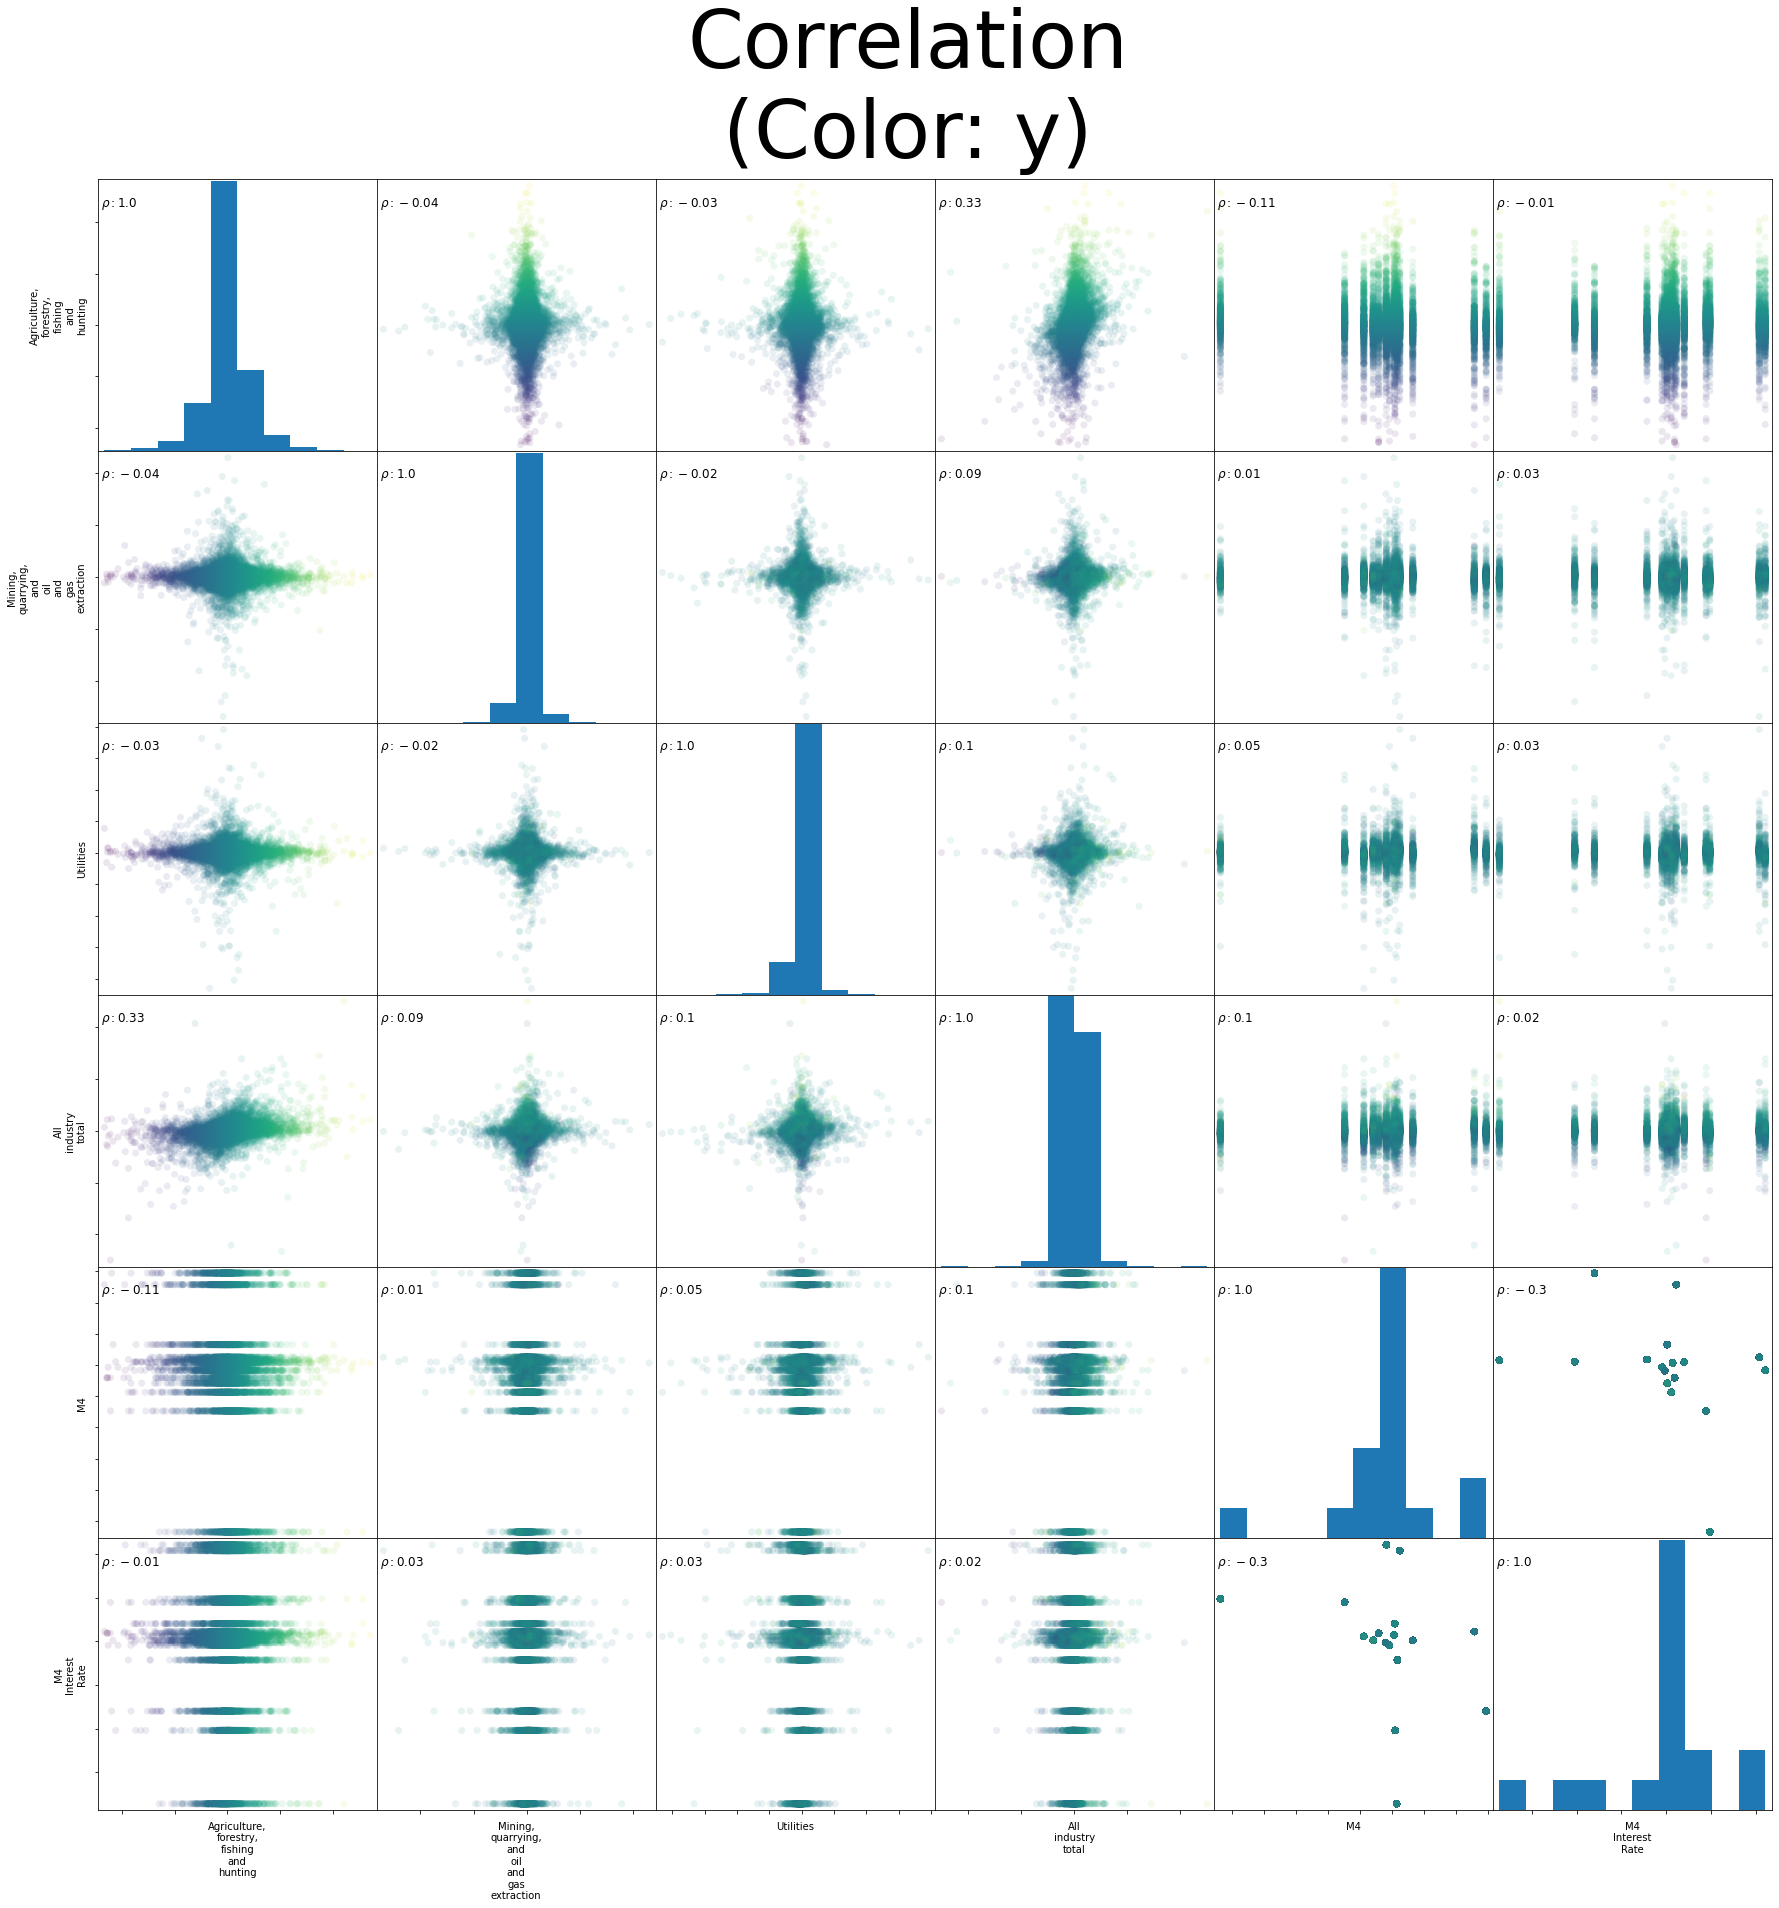

In [41]:
import pingouin
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams.update({'font.size': 30})
plt.rcParams['axes.xmargin'] = .001
plt.rcParams['axes.ymargin'] = .005
def full_corr_plot(data, color = "C0", pcorr = False):
    if pcorr == True:
        corr_df = data.pcorr()
    elif pcorr == False:
        corr_df = data.corr()
    keys = list(corr_df.keys())
    dim = len(keys)

    fig, ax = plt.subplots(figsize = (30, 30))
    a = pd.plotting.scatter_matrix(data, c = color, 
                                   s = 200, alpha = .1, ax=ax)  
    for i in range(len(keys)):
        x = keys[i]
        for j in range(len(keys)):
            y = keys[j]
            a[i][j].set_xticklabels([])
            a[i][j].set_yticklabels([])
            a[i][j].set_title("$\\rho :" + str(corr_df.round(2)[x][y])+ "$", y = .88, x = 0.01, ha = "left")        
    plt.suptitle("Correlation\n(Color: y)",y = .96, fontsize = 80)
plot_df = ips_dct2['Diff'].dropna()
plot_df.rename(columns = {key:key.replace(" ", "\n") for key in plot_df.keys()}, inplace = True)
plot_keys = list(plot_df.keys())
full_corr_plot(plot_df, color = plot_df[plot_keys[0]], pcorr = True)
# y_var = ['Agriculture, forestry, fishing and hunting']
# x_vars = ['Mining, quarrying, and oil and gas extraction', 'Utilities', 'Construction', 'Manufacturing']
# corr_var = y_var + x_vars
# corr_data = log_df[corr_var]
# corr_data.corr().round(3)

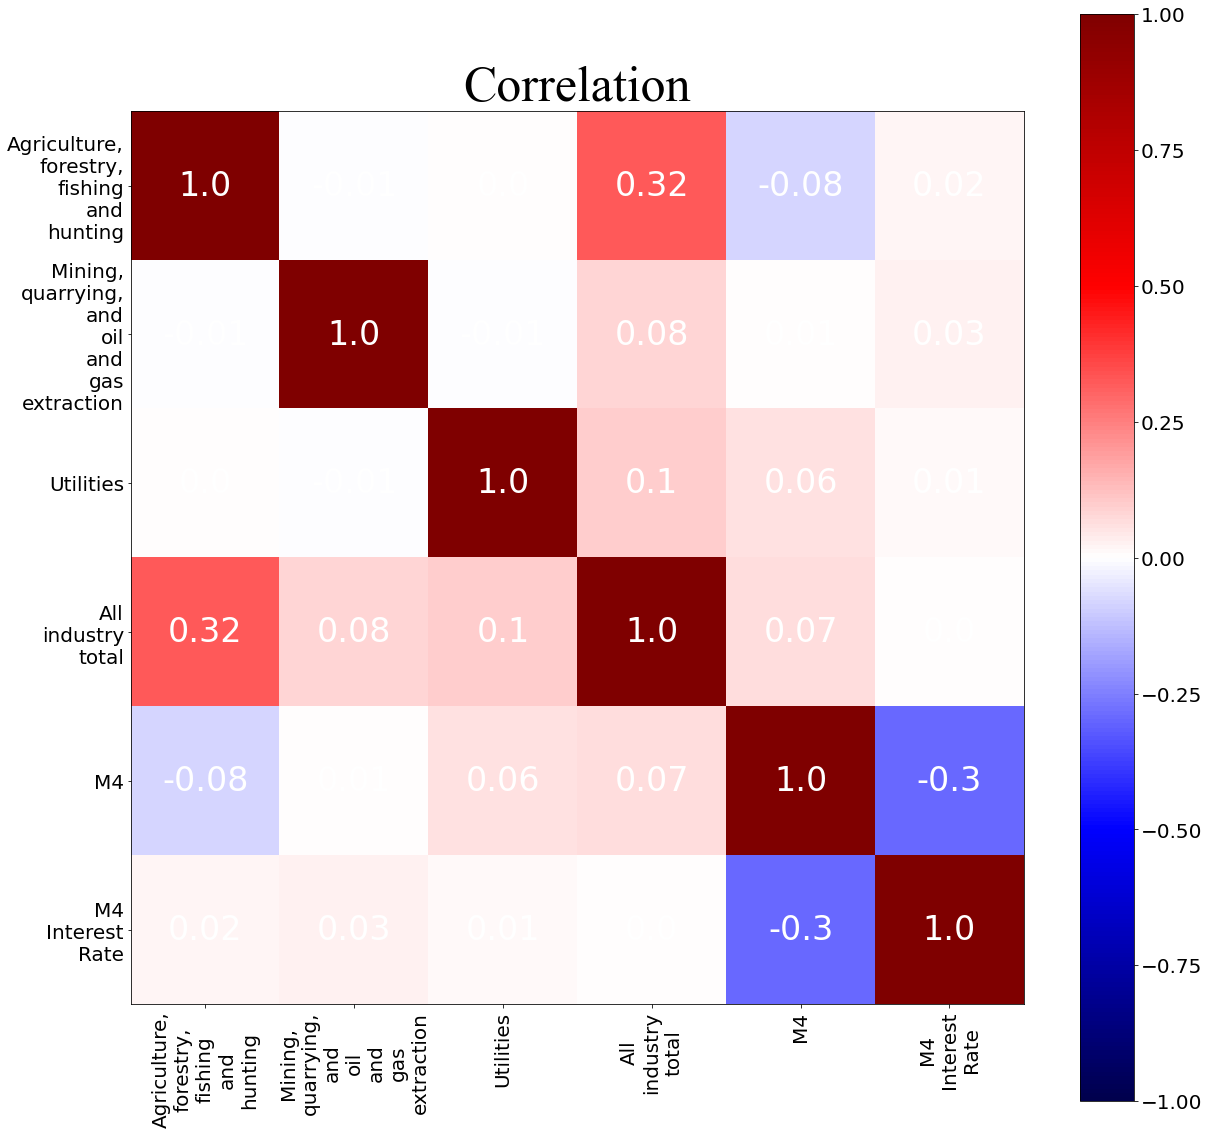

In [42]:
import numpy as np
# . . .
def corr_matrix_heatmap(data, pp = False):  
    #Create a figure to visualize a corr matrix  
    fig, ax = plt.subplots(figsize=(20,20))  
    # use ax.imshow() to create a heatmap of correlation values  
    # seismic mapping shows negative values as blue and positive values as red  
    im = ax.imshow(data, norm = plt.cm.colors.Normalize(-1,1), cmap = "seismic")  
    # create a list of labels, stacking each word in a label by replacing " "  
    # with "\n"  
    labels = data.keys()  
    num_vars = len(labels)  
    tick_labels = [lab.replace(" ", "\n") for lab in labels]  
    # adjust font size according to the number of variables visualized  
    tick_font_size = 120 / num_vars  
    val_font_size = 200 / num_vars  
    plt.rcParams.update({'font.size': tick_font_size}) 
    # prepare space for label of each column  
    x_ticks = np.arange(num_vars)  
    # select labels and rotate them 90 degrees so that they are vertical  
    plt.xticks(x_ticks, tick_labels, fontsize = tick_font_size, rotation = 90)  
    # prepare space for label of each row  
    y_ticks = np.arange(len(labels))  
    # select labels  
    plt.yticks(y_ticks, tick_labels, fontsize = tick_font_size)  
    # show values in each tile of the heatmap  
    for i in range(len(labels)):  
        for j in range(len(labels)):  
            text = ax.text(i, j, str(round(data.values[i][j],2)),  
                           fontsize= val_font_size, ha="center",   
                           va="center", color = "w")  
    #Create title with Times New Roman Font  
    title_font = {"fontname":"Times New Roman"}  
    plt.title("Correlation", fontsize = 50, **title_font)  
    #Call scale to show value of colors 
    cbar = fig.colorbar(im)
    plt.show()
    if pp != False:
        pp.savefig(fig, bbox_inches="tight")
    plt.close()

#. . . 
# . . .
corr_matrix_heatmap(plot_df.corr())


In [43]:
# list(plot_df)
# ips_df
plot_df.rename(columns = {key:key[:4].replace("\n", "") for key in plot_df.keys()}, inplace = True)
list(plot_df.keys())

['Agri', 'Mini', 'Util', 'All', 'M4', 'M4I']

Working for n conditional variables: 4: 100%|████████████████████████████████████████████| 4/4 [00:00<00:00,  6.34it/s]


keep control: Agri
('Util', 'All') ['Agri']
keep control: Agri
('Util', 'M4') ['Agri']
keep control: Util
('Agri', 'All') ['Util']
keep control: Util
('Agri', 'M4') ['Util']


OutEdgeView([('Util', 'All'), ('Util', 'M4'), ('Agri', 'All'), ('Agri', 'M4')])

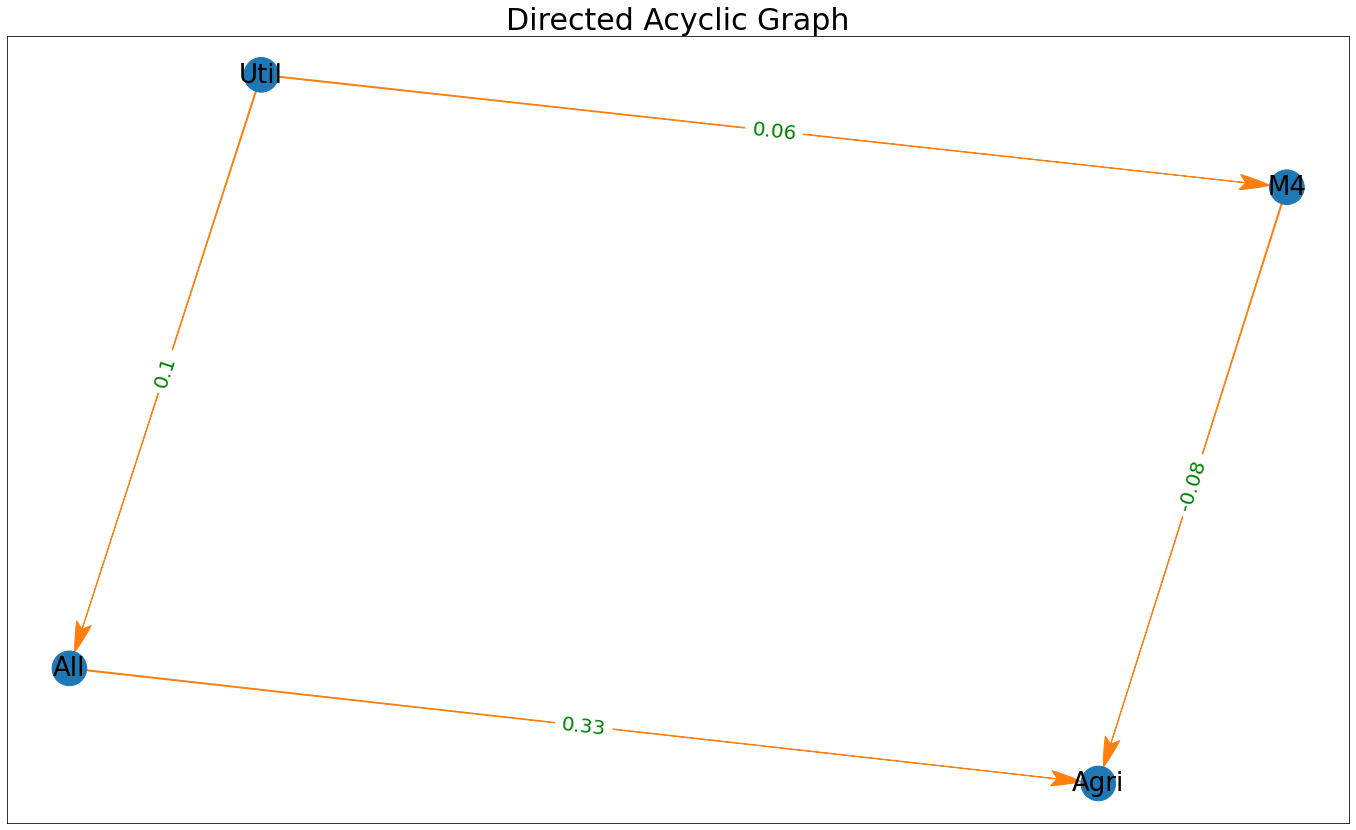

In [48]:
from matplotlib.patches import ArrowStyle
import copy

undirected_graph = {key:[] for key in plot_df.keys()}
for x in undirected_graph:
    remaining_vars = [y for y in plot_df.keys() if y != x]
    for y in remaining_vars:
        undirected_graph[x].append(y)

p_value = .01
import matplotlib.pyplot as plt
import networkx as nx
from pgmpy.estimators import PC
c = PC(plot_df)
max_cond_vars = len(plot_df.keys()) - 2

model = c.estimate(return_type = 'pdag', variant= 'parallel', significance_level = p_value,
                  max_cond_vars = max_cond_vars, ci_test = 'pearsonr')
edges = model.edges


def graph_DAG(edges, df, title = ""):
    graph = nx.Graph()
    edge_labels = {}
    for edge in edges:
        controls = [key for key in df.keys() if key not in edge]
        controls = list(set(controls))
        keep_controls = []
        for control in controls:
            control_edges = [ctrl_edge for ctrl_edge in edges if control == ctrl_edge[0]]
            if (control, edge[1]) in control_edges:
                print('keep control:', control)
                keep_controls.append(control)
        print(edge, keep_controls)
        pcorr = df[[edge[0], edge[1]]+keep_controls].pcorr()
        edge_labels[edge] = str(round(pcorr[edge[0]].loc[edge[1]],2))
    graph.add_edges_from(edges)
    color_map = ['C0' for g in graph]
    
    fig, ax = plt.subplots(figsize = (20, 12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)
    
    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph, pos, node_color=color_map, node_size=1200, with_labels=True,
                    arrows=True, font_color ='k', font_size=26, alpha=1, width = 1,
                    edge_color = 'C1',
                     arrowstyle=ArrowStyle('Fancy, head_length=3, head_width=1.5, tail_width=.1'), ax = ax)
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color='green', font_size=20)
    
graph_DAG(edges, plot_df, title = 'Directed Acyclic Graph')
                                                             
edges

### DAGs with multiple significance levels

In [45]:
Data = plot_df

Working for n conditional variables: 4: 100%|███████████████████████████████████████████| 4/4 [09:48<00:00, 147.08s/it]


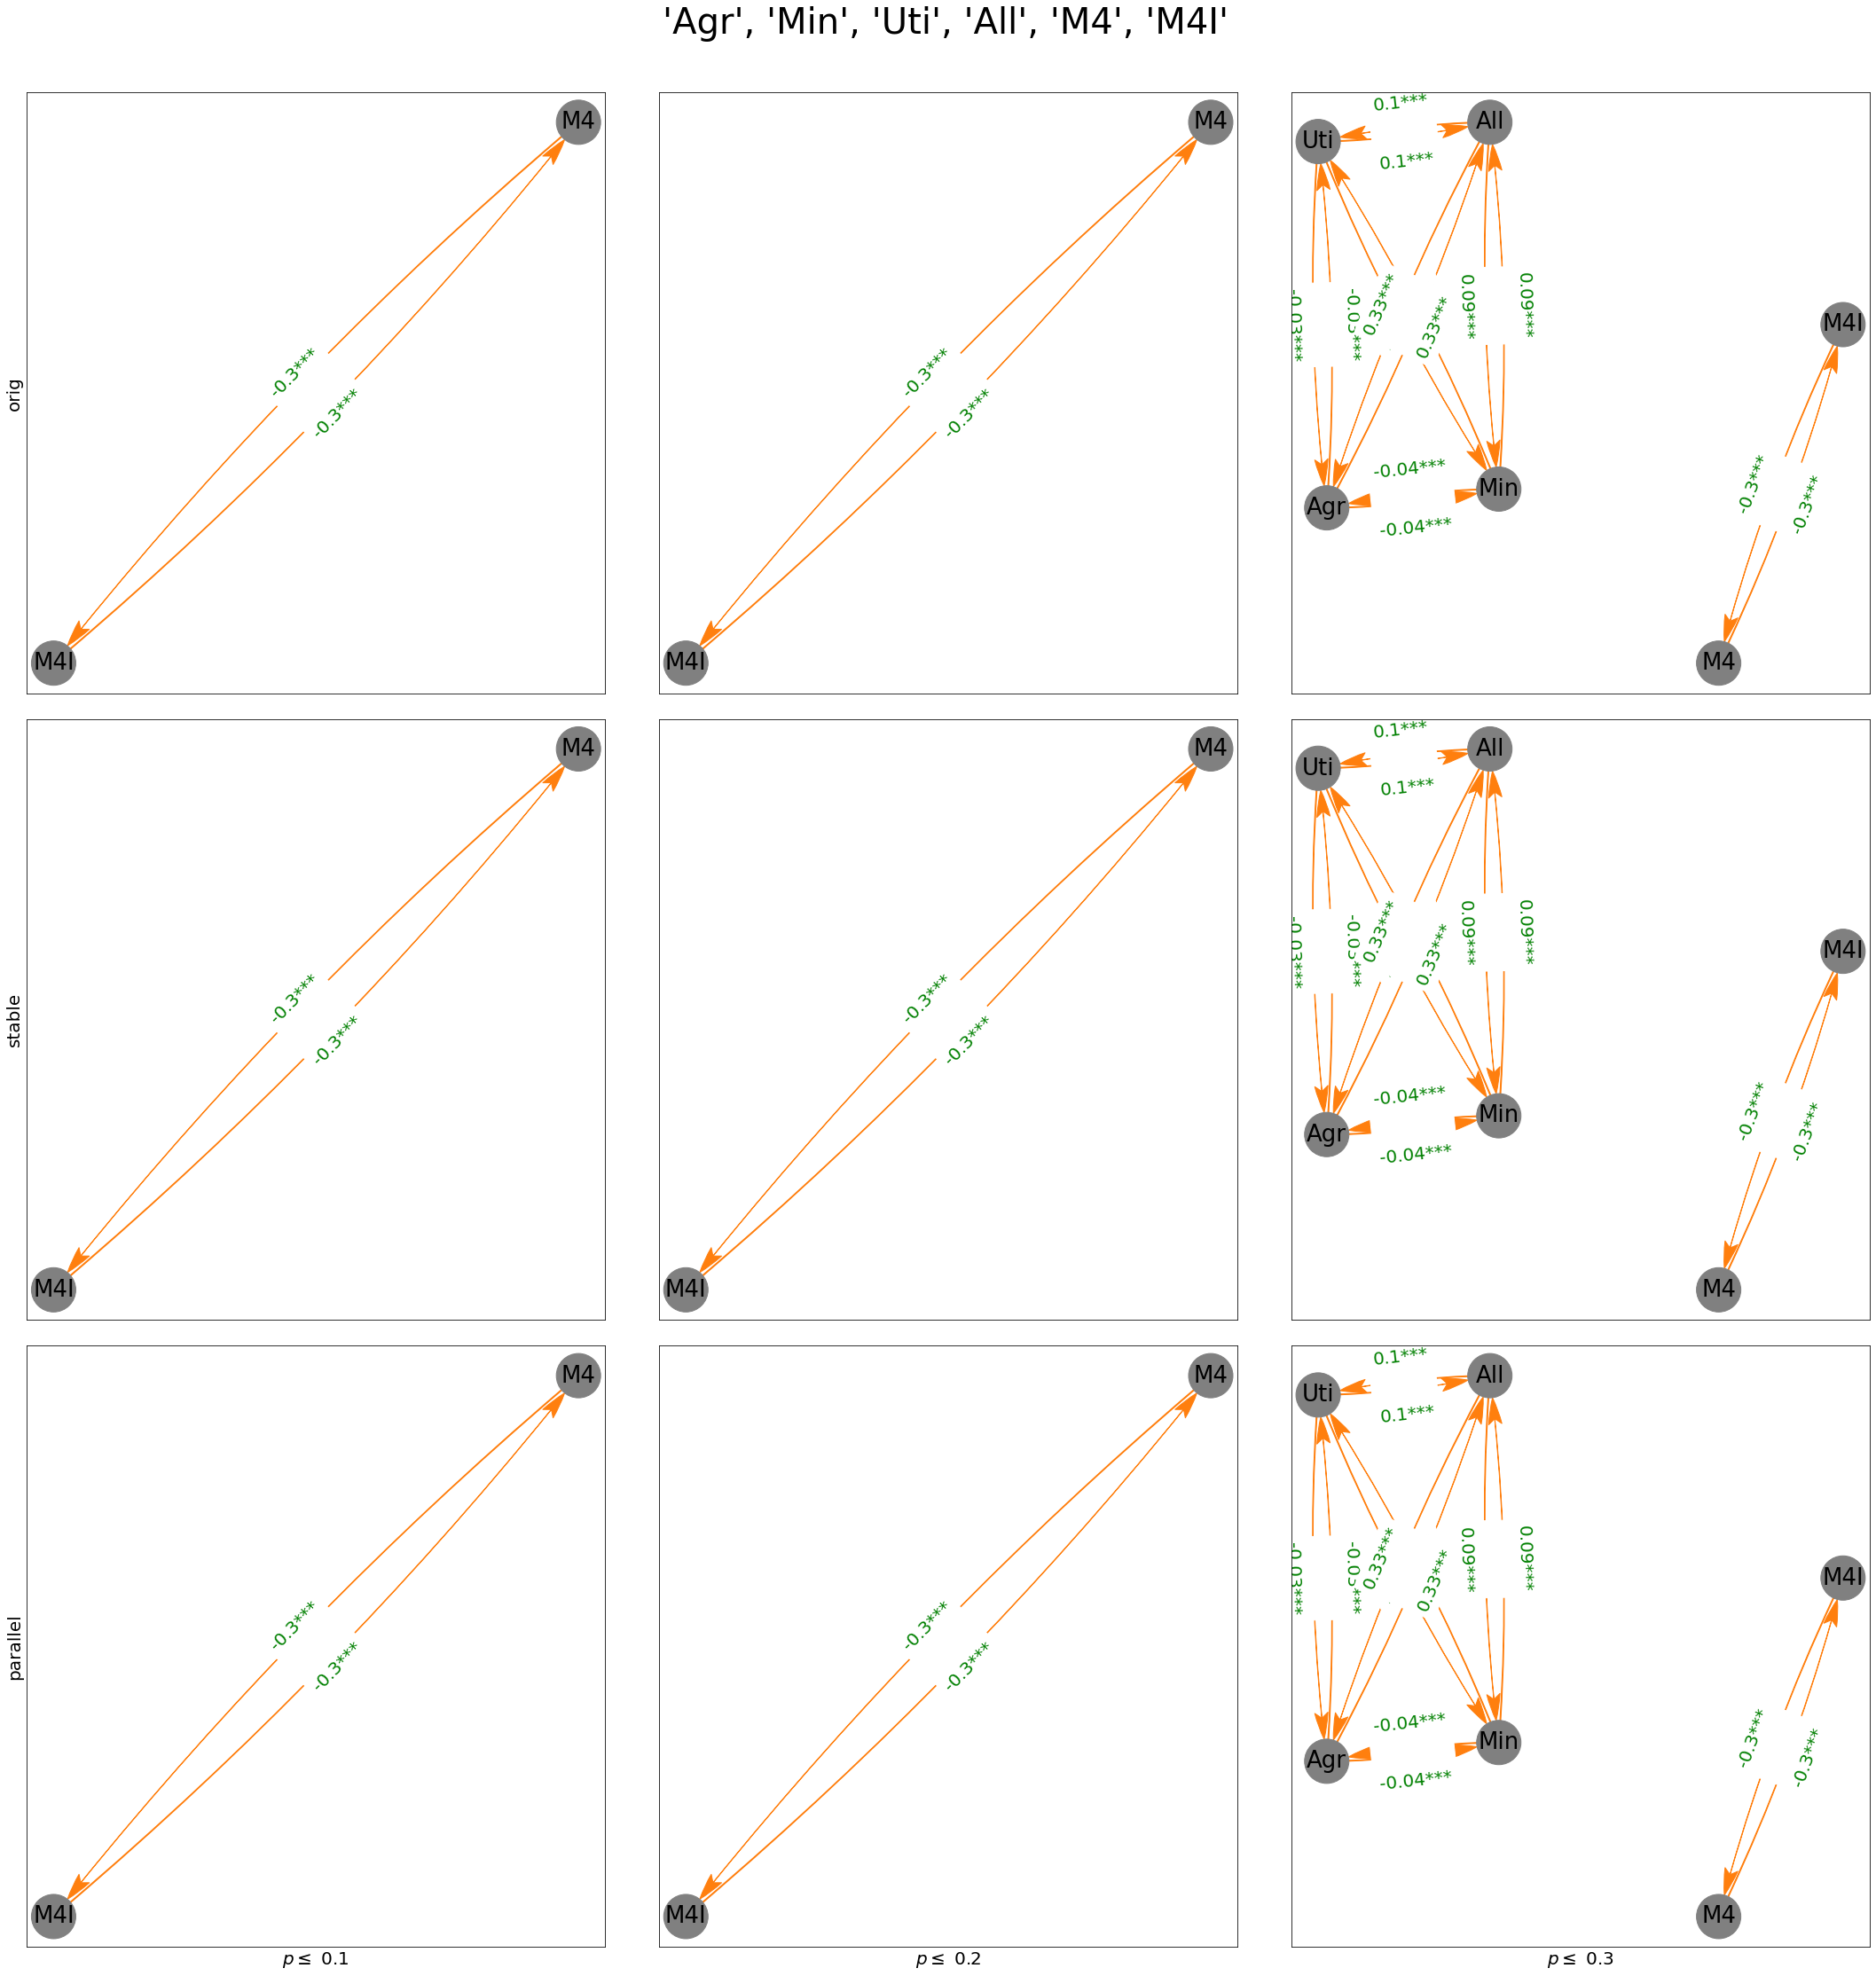

OutEdgeView([('Agr', 'Uti'), ('Agr', 'Min'), ('Agr', 'All'), ('Uti', 'Min'), ('Uti', 'Agr'), ('Uti', 'All'), ('Min', 'Uti'), ('Min', 'Agr'), ('Min', 'All'), ('M4', 'M4I'), ('M4I', 'M4'), ('All', 'Uti'), ('All', 'Agr'), ('All', 'Min')])

In [46]:
import pingouin
from pgmpy.estimators import PC
import matplotlib.pyplot as plt
from matplotlib.patches import ArrowStyle
from networkx.drawing.nx_agraph import graphviz_layout
import warnings
warnings.filterwarnings("ignore")
from matplotlib.backends.backend_pdf import PdfPages
import networkx as nx


def firstLetterWord(str, num_chars = 3):
 
    result = ""
 
    # Traverse the string.
    v = True
    for i in range(len(str)):
         
        # If it is space, set v as true.
        if (str[i] == ' '):
            v = True
 
        # Else check if v is true or not.
        # If true, copy character in output
        # string and set v as false.
        elif (str[i] != ' ' and v == True):
            result += (str[i:i+num_chars])
            v = False
 
    return result

def graph_DAG(edges, data_reg, title = "", 
              fig = False, ax = False, 
              edge_labels = False,sig_vals = [0.05, 0.01, 0.001]):
    pcorr = data_reg.pcorr()
    graph = nx.DiGraph()
    def build_edge_labels(edges, df, sig_vals):
        edge_labels = {}
        for edge in edges:
            controls = [key for key in df.keys() if key not in edge]
            controls = list(set(controls))
            keep_controls = []
            for control in controls:
                control_edges = [ctrl_edge for ctrl_edge in edges if control == ctrl_edge[0] ]
                if (control, edge[1]) in control_edges:
                    keep_controls.append(control)                
#             print(edge, keep_controls)
            pcorr = df.partial_corr(x = edge[0], y = edge[1], covar=keep_controls,
                                  method = "pearson")
            label = str(round(pcorr["r"][0],2))
            pvalue = pcorr["p-val"][0]
#             pcorr = df[[edge[0], edge[1]]+keep_controls].pcorr()
#             label = pcorr[edge[0]].loc[edge[1]]

            for sig_val in sig_vals:
                if pvalue < sig_val: 
                    label = label + "*"   
            
            edge_labels[edge] = label
        return edge_labels
    
    if edge_labels == False:
        edge_labels = build_edge_labels(edges, 
                                        data_reg, 
                                        sig_vals=sig_vals) 
    graph.add_edges_from(edges)
    color_map = ["grey" for g in graph]

    if fig == False and ax == False: fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = graphviz_layout(graph)

    edge_labels2 = []
    for u, v, d in graph.edges(data=True):
        if pos[u][0] > pos[v][0]:  
            if (v,u) in edge_labels.keys():
                edge_labels2.append(((u, v,), f'{edge_labels[u,v]}\n\n\n{edge_labels[(v,u)]}'))  
        if (v,u) not in edge_labels.keys():
            edge_labels2.append(((u,v,), f'{edge_labels[(u,v)]}'))
    edge_labels = dict(edge_labels2)

    nx.draw_networkx(graph, pos, node_color=color_map, node_size = 2500,
                     with_labels=True,  arrows=True,
                     font_color = "black",
                     font_size = 26, alpha = 1,
                     width = 1, edge_color = "C1",
                     arrowstyle=ArrowStyle("Fancy, head_length=3, head_width=1.5, tail_width=.1"),
                     connectionstyle='arc3, rad = 0.05',
                     ax = a)
    nx.draw_networkx_edge_labels(graph,pos,
                                 edge_labels=edge_labels,
                                 font_color='green',
                                 font_size=20,
                                ax = a)
    
    
pp = PdfPages("DAGOutputs.pdf")
DAG_models_vars = {5:["Agri", "Mini", "Util", "All", "M4", "M4I"],}
# link_sigs = [0.05, 0.1, 0.2]
# link_sigs = [0.3, 0.4, 0.5]
link_sigs = [0.1, .2, .3]
algorithms = ["orig", "stable", "parallel"]
for keys in DAG_models_vars.values():
    fig, ax = plt.subplots(len(algorithms), len(link_sigs), figsize = (30,30))
    max_cond_vars = len(keys) - 2
    data_reg = Data[keys].dropna()
    data_reg.rename(columns = {col:firstLetterWord(col) for col in keys}, inplace = True)
    keys = data_reg.keys()
    c = PC(data_reg[keys].dropna())
    max_cond_vars = len(keys) - 2
    i,j = 0,0
    for sig in link_sigs:
        for algorithm in algorithms:
            model = c.estimate(return_type = "pdag", variant = algorithm, 
                               significance_level = sig, 
                               max_cond_vars = max_cond_vars, ci_test = "chi_square")
            edges = model.edges()
            pcorr = data_reg.pcorr()
            weights = {}
            a = ax[i][j]
            graph_DAG(edges, data_reg, fig = fig, ax = a)
        
            if j == 0:
                a.set_ylabel(algorithm, fontsize = 20)
            if i == len(algorithms) - 1:
                a.set_xlabel("$p \leq$ "+ str(sig), fontsize = 20)
            i += 1
        j += 1
        i = 0
    plt.suptitle(str(list(keys)).replace("[","").replace("]",""), fontsize = 40, y =1.035)
    plt.show()
    pp.savefig(fig, bbox_inches = "tight")
    plt.close()
pp.close()
edges